In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import math

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
api = KaggleApi()
api.authenticate()
dataset_url = "lava18/google-play-store-apps"
download_path = "datesets/google-play-store-apps"
api.dataset_download_files(dataset_url, path=download_path, unzip=True)

print(f"Dataset downloaded to: {os.path.abspath(download_path)}")

Dataset URL: https://www.kaggle.com/datasets/lava18/google-play-store-apps
Dataset downloaded to: C:\Users\user\python\course\datesets\google-play-store-apps


In [3]:
dataset_file1= "datesets/google-play-store-apps/googleplaystore.csv"
dataset_file2 = "datesets/google-play-store-apps/googleplaystore_user_reviews.csv"

קריאת הדאטה

In [4]:
df = pd.read_csv(dataset_file1)

In [5]:
df_users = pd.read_csv(dataset_file2)

מבט ראשוני על הדאטה

In [6]:
df.shape

(10841, 13)

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


העמודות לא סווגו נכון,
נעבר עמודה עמודה ונטפל בה

עמודת גודל הקובץ מכילה מחרוזות, יש לטפל בעמודה קודם כל יש לאפיין את המחרוזות הקיימות

In [9]:
df["New_Size"] = df["Size"].apply(lambda x: x[-1])

In [10]:
df["New_Size"].unique()

array(['M', 'e', 'k', '+'], dtype=object)

In [11]:
df[df["New_Size"] == "e"]["Size"].unique()

array(['Varies with device'], dtype=object)

In [12]:
df[df["New_Size"] == "k"]["Size"].unique()

array(['201k', '23k', '79k', '118k', '695k', '18k', '556k', '526k',
       '334k', '232k', '624k', '8.5k', '41k', '292k', '11k', '704k',
       '862k', '899k', '378k', '266k', '375k', '975k', '980k', '696k',
       '544k', '525k', '920k', '779k', '853k', '720k', '713k', '772k',
       '318k', '58k', '241k', '196k', '857k', '51k', '953k', '865k',
       '251k', '930k', '540k', '313k', '746k', '203k', '26k', '314k',
       '239k', '371k', '220k', '730k', '756k', '91k', '293k', '17k',
       '74k', '14k', '317k', '78k', '924k', '902k', '818k', '81k', '939k',
       '169k', '45k', '475k', '965k', '545k', '61k', '283k', '655k',
       '714k', '93k', '872k', '121k', '322k', '976k', '172k', '238k',
       '549k', '206k', '954k', '444k', '717k', '210k', '609k', '308k',
       '705k', '306k', '904k', '473k', '175k', '350k', '383k', '454k',
       '421k', '70k', '812k', '442k', '842k', '417k', '412k', '459k',
       '478k', '335k', '782k', '721k', '430k', '429k', '192k', '200k',
       '460k', '

In [13]:
df[df["New_Size"] == "e"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Size
37,Floor Plan Creator,ART_AND_DESIGN,4.10,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,e
42,Textgram - write on photos,ART_AND_DESIGN,4.40,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,e
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.60,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,e
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.30,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,e
68,REPUVE,AUTO_AND_VEHICLES,3.90,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.40,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,e
10725,Posta App,MAPS_AND_NAVIGATION,3.60,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,e
10765,Chat For Strangers - Video Chat,SOCIAL,3.40,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,e
10826,Frim: get new friends on local chat rooms,SOCIAL,4.00,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,e


In [14]:
df[df["New_Size"] == "+"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Size
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,+


השורה הזאת מלאה טעויות,
מוחק את השורה הזאת

In [15]:
df.drop(df[df['Rating'] == 19.0].index, inplace = True)

ממיר את כל הערכים המסמנים למספרים

In [16]:
def convert_size(value):
    if isinstance(value, str):  # לבדוק אם הערך הוא מחרוזת
        if value.endswith('M') or value.endswith('m'):
            return float(value[:-1])   # הסרת 'M' והמרה למיליונים
        elif value.endswith('K') or value.endswith('k'):
            return float(value[:-1])/1_000  # הסרת 'K' והמרה לאלפים
        elif value == 'Varies with device':
            return np.nan  # המרת הערך ל-NULL
    return value  # החזרת הערך המקורי אם אין התאמה

# יישום הפונקציה על העמודה SIZE
df['Size'] = df['Size'].apply(convert_size)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  New_Size        10840 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.2+ MB


In [18]:
df.drop(columns=['New_Size'], inplace=True)

- Reviews
נגדיר אותה כעמודה מספרית

In [19]:
df['Reviews'] = df['Reviews'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Installs נגדיר אותה כעמודה מספרית

In [21]:
df[["Installs"]].value_counts()

Installs      
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [22]:
df["Installs"]= df["Installs"].apply(lambda x: x[:-1])


In [23]:
df["Installs"].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  14
                    1
Name: count, dtype: int64

In [24]:
df["Installs"].astype(int)

ValueError: invalid literal for int() with base 10: '10,000'

In [52]:
df["Installs"] = df["Installs"].str.replace(',', '')

In [53]:
df[df["Installs"] =='']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,,NaN,0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,NaN,NaN


In [54]:
 df["Installs"] = df["Installs"].replace('',0).astype(int)


In [55]:
df["Installs"].value_counts()

Installs
1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: count, dtype: int64

In [56]:
df["Installs"] = df["Installs"].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int32         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int32         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
 13  Start Version   9134 non-null   float64       
 14  End Version     9 non-null      float64       
dtypes: date

עכשיו נגדיר את Price

In [58]:
df['Price'].value_counts()

Price
0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: count, Length: 92, dtype: int64

In [59]:
df['Price'] = df['Price'].astype(str).apply(lambda x: x[1:] if x.startswith('$') else x)

In [60]:
df['Price'].value_counts()

Price
0         9592
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: count, Length: 92, dtype: int64

In [61]:
 df['Price']= df['Price'].astype(float)

In [62]:
 df['Price'].value_counts()

Price
0.00      9592
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: count, Length: 92, dtype: int64

In [63]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.00,NaN
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4.00,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.00,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.20,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.40,NaN


עכשיו נגדיר את העמודה עדכון אחרון

אני בודק האם כל הערכים מכילים מספרים (שנה) אם לא צריך לטפל בערכים החריגים

In [64]:
df[df['Last Updated'].astype(str).str.contains(r'\d', na=False)]['Last Updated'].value_counts().sum()

10357

In [65]:
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [66]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y', errors='coerce')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int32         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int32         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
 13  Start Version   9134 non-null   float64       
 14  End Version     9 non-null      float64       
dtypes: date

In [68]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.00,NaN
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4.00,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.00,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.20,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.40,NaN


In [69]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

העמודה נראית מאוד מבולגנת אני לא מעוניין להפוך אותה לנומרית

In [70]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [71]:
def split_versions(version):
    # המרה למחרוזת אם מקבלים מספר
    version = str(version)
    
    if "Varies with device" in version:
        return pd.Series([np.nan, np.nan])
    elif " - " in version:  # אם יש טווח של גרסאות
        start, end = version.split(" - ")
    elif "and up" in version:  # אם יש רק התחלה וללא מגבלת סיום
        start, end = version.replace(" and up", ""), np.nan
    else:
        start, end = pd.Series([np.nan, np.nan])  # טיפול במקרים חריגים
    
    return pd.Series([start, end])

# הוספת העמודות החדשות
df[['Start Version', 'End Version']] = df['Android Ver'].apply(split_versions)

In [72]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.0.3,NaN
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4.0.3,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.0.3,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.2,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.4,NaN


In [73]:
df['Start Version'].value_counts()

Start Version
4.1      2380
4.0.3    1453
4.0      1337
4.4       894
2.3       643
5.0       550
4.2       387
2.3.3     279
2.2       240
3.0       237
4.3       235
2.1       133
1.6       116
6.0        58
7.0        43
3.2        36
2.0        32
5.1        22
1.5        20
4.4W       11
3.1        10
2.0.1       7
8.0         6
7.1         3
1.0         2
Name: count, dtype: int64

In [74]:
df["Start Version"] = df["Start Version"].astype(str).apply(lambda x: x[:3])
df["Start Version"].value_counts()

Start Version
4.0    2790
4.1    2380
nan    1223
2.3     922
4.4     905
5.0     550
4.2     387
2.2     240
3.0     237
4.3     235
2.1     133
1.6     116
6.0      58
7.0      43
2.0      39
3.2      36
5.1      22
1.5      20
3.1      10
8.0       6
7.1       3
1.0       2
Name: count, dtype: int64

In [75]:
df["Start Version"] = df["Start Version"].astype(str).apply(lambda x: x[:3])
df["Start Version"].value_counts()

Start Version
4.0    2790
4.1    2380
nan    1223
2.3     922
4.4     905
5.0     550
4.2     387
2.2     240
3.0     237
4.3     235
2.1     133
1.6     116
6.0      58
7.0      43
2.0      39
3.2      36
5.1      22
1.5      20
3.1      10
8.0       6
7.1       3
1.0       2
Name: count, dtype: int64

In [76]:
df['End Version'].value_counts()

End Version
7.1.1    6
8.0      2
6.0      1
Name: count, dtype: int64

In [77]:
df["End Version"] = df["End Version"].astype(str).apply(lambda x: x[:3])
df["End Version"].value_counts()

End Version
nan    10348
7.1        6
8.0        2
6.0        1
Name: count, dtype: int64

In [78]:
df["Start Version"] = df["Start Version"].astype(float)

In [79]:
df["End Version"] = df["End Version"].astype(float)

In [80]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               459
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
Start Version       21
End Version          3
dtype: int64

In [81]:
df["App"].value_counts()

App
ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: count, Length: 9659, dtype: int64

In [82]:
df[df["App"]=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
1653,ROBLOX,GAME,4.50,4447388,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
1701,ROBLOX,GAME,4.50,4447346,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
1748,ROBLOX,GAME,4.50,4448791,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
1841,ROBLOX,GAME,4.50,4449882,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
1870,ROBLOX,GAME,4.50,4449910,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
2016,ROBLOX,FAMILY,4.50,4449910,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
2088,ROBLOX,FAMILY,4.50,4450855,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
2206,ROBLOX,FAMILY,4.50,4450890,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN
4527,ROBLOX,FAMILY,4.50,4443407,67.00,100000000,Free,0.00,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.10,NaN


In [83]:
df[df["App"]=="ESPN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
2959,ESPN,SPORTS,4.20,521138,NaN,10000000,Free,0.00,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up,5.00,NaN
3048,ESPN,SPORTS,4.20,521140,NaN,10000000,Free,0.00,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up,5.00,NaN
4069,ESPN,SPORTS,4.20,521081,NaN,10000000,Free,0.00,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up,5.00,NaN


In [84]:
len(df["App"].value_counts()[df["App"].value_counts()>1])

523

In [85]:
df = df.drop_duplicates()

In [86]:
len(df["App"].value_counts()[df["App"].value_counts()>1])

523

In [87]:
df[df["App"].isin(df["App"].value_counts()[df["App"].value_counts()>1].index)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4.00,NaN
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.00,100000,Free,0.00,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up,4.10,NaN
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.70,8145,24.00,500000,Free,0.00,Everyone,Art & Design;Creativity,2018-08-02,1.0.9,4.4 and up,4.40,NaN
42,Textgram - write on photos,ART_AND_DESIGN,4.40,295221,NaN,10000000,Free,0.00,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,NaN,NaN
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.60,2914724,NaN,100000000,Free,0.00,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.90,54815,NaN,100000000,Free,0.00,Everyone,Video Players & Editors,2018-05-02,Varies with device,Varies with device,NaN,NaN
10715,FarmersOnly Dating,DATING,3.00,1145,1.40,100000,Free,0.00,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,4.00,NaN
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.40,36981,4.00,1000000,Free,0.00,Everyone,Communication,2018-07-06,5.2,5.0 and up,5.00,NaN
10730,FP Notebook,MEDICAL,4.50,410,60.00,50000,Free,0.00,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,4.40,NaN


In [88]:
Define_dup =df[df["App"].isin(df["App"].value_counts()[df["App"].value_counts()>1].index)].groupby('App').agg(
nounique_Category=('Category', 'nunique'),     
Median_Rating=('Rating', 'median'),          
std_Rating=('Rating', 'std'),              
Median_Reviews=('Reviews', 'median') ,
std_Reviews=('Reviews', 'std'),
Median_Size=('Size', 'median') ,
std_Size=('Size', 'std'),
Median_Installs=('Installs', 'median') ,
std_Installs=('Installs', 'std'),
Median_Price=('Price', 'median') ,
std_Price=('Price', 'std'),
nounique_Genres=('Genres', 'nunique')
)
Define_dup

,nounique_Category,Median_Rating,std_Rating,Median_Reviews,std_Reviews,Median_Size,std_Size,Median_Installs,std_Installs,Median_Price,std_Price,nounique_Genres
App,,,,,,,,,,,,
365Scores - Live Scores,1,4.60,0.00,666383.50,194.45,25.00,0.00,10000000.00,0.00,0.00,0.00,1
8 Ball Pool,2,4.50,0.00,14200344.00,5943.04,52.00,0.00,100000000.00,0.00,0.00,0.00,1
95Live -SG#1 Live Streaming App,1,4.10,0.00,4953.50,0.71,15.00,0.00,1000000.00,0.00,0.00,0.00,1
A&E - Watch Full Episodes of TV Shows,2,4.00,0.00,29707.00,1.41,19.00,0.00,1000000.00,0.00,0.00,0.00,1
AC - Tips & News for Android™,1,4.20,0.00,23291.50,0.71,14.00,0.00,1000000.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
slither.io,1,4.40,0.00,5234810.00,1495.18,NaN,NaN,100000000.00,0.00,0.00,0.00,1
stranger chat - anonymous chat,1,3.50,0.00,13203.00,1.41,6.10,0.00,1000000.00,0.00,0.00,0.00,1
textPlus: Free Text & Calls,1,4.10,0.00,382120.50,0.71,28.00,0.00,10000000.00,0.00,0.00,0.00,1


אני בודק בכמה אפילקציות יש לי ערכים שונים בעמדות 

In [89]:
for col in ['std_Rating','std_Reviews','std_Size','std_Installs','std_Price']:
    print(col,':',Define_dup[col][Define_dup[col] >0].count())

std_Rating : 17
std_Reviews : 517
std_Size : 13
std_Installs : 15
std_Price : 2


In [90]:
for col in ['nounique_Category','nounique_Genres']:
    print(col,':',Define_dup[col][Define_dup[col] >1].count())

nounique_Category : 85
nounique_Genres : 8


In [91]:
df = df.drop_duplicates(subset=['App'], keep='first')  # שומר את ההופעה הראשונה

In [92]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated,Start Version,End Version
count,8196.00,9659.00,8432.00,9659.00,9659.00,9659,8667.00,9.00
mean,4.17,216592.56,20.40,7777506.73,1.10,2017-10-30 19:34:02.074748928,3.84,7.18
min,1.00,0.00,0.01,0.00,0.00,2010-05-21 00:00:00,1.00,6.00
25%,4.00,25.00,4.60,1000.00,0.00,2017-08-05 12:00:00,4.00,7.10
50%,4.30,967.00,12.00,100000.00,0.00,2018-05-04 00:00:00,4.00,7.10
75%,4.50,29401.00,28.00,1000000.00,0.00,2018-07-17 00:00:00,4.10,7.10
max,5.00,78158306.00,100.00,1000000000.00,400.00,2018-08-08 00:00:00,8.00,8.00
std,0.54,1831319.57,21.83,53758278.68,16.85,NaN,0.85,0.59


לפחות 75% מהאפליקציות קיבלו את הציון 4 ומעלה, מה שאומר שהדירוג 4 הוא לא נחשב לגבוה ביחס לאלפליקציות האחרות בדאטה

הרוב המוחלט של האפליקציות בחינם

הדאטה מכיל אפליקציות שעודכנו משנת 2010 עד 2018

ככל הנראה הדאטה משנת 2018

רוב מוחלט של האפליקציות תומכות מגרסא 4

הערך 400 בעמודת מחיר נראה חריג

In [113]:
df[df['Price']>100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
4197,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,7.00,NaN
4362,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,4.40,NaN
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4.10,NaN
5351,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,4.00,NaN
5354,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,4.40,NaN
5355,I am rich VIP,LIFESTYLE,3.80,411,2.60,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,4.30,NaN
5356,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,4.00,NaN
5357,I am extremely Rich,LIFESTYLE,2.90,41,2.90,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up,4.00,NaN
5358,I am Rich!,FINANCE,3.80,93,22.00,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,4.10,NaN
5359,I am rich(premium),FINANCE,3.50,472,0.96,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,4.40,NaN


שמות האפליקציות נראות מאוד חריגות  
לכולם יש את אותו השם

In [102]:
num_cols= df.dtypes[df.dtypes != 'object'].index
num_cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Start Version', 'End Version'],
      dtype='object')

In [126]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
cat_cols

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'],
      dtype='object')

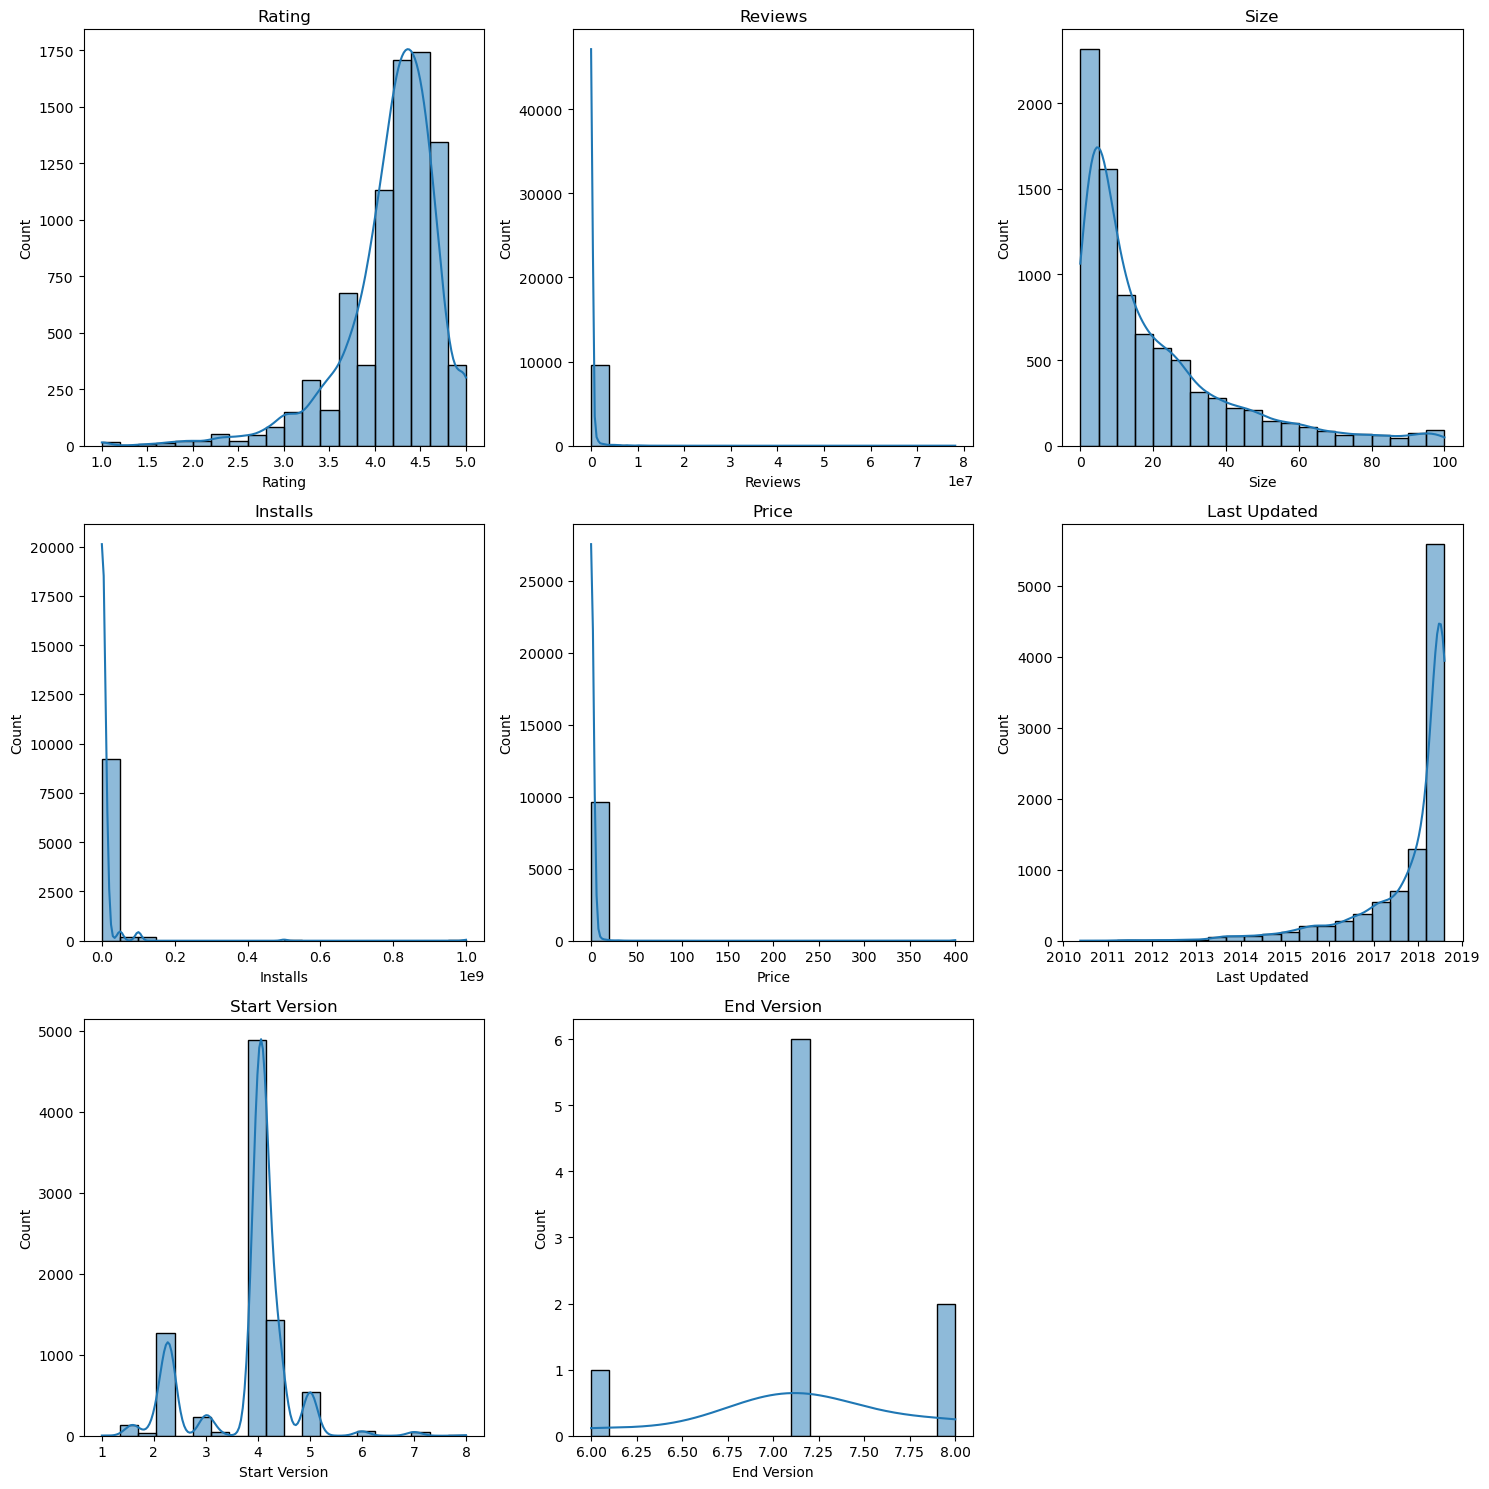

In [105]:
# חישוב דינמי של שורות ועמודות
ncols = 3  # מספר העמודות שרוצים בשורה
nrows = int(np.ceil(len(num_cols) / ncols))  # חישוב מספר השורות הדרושות

# יצירת הגריד
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# הפיכת axes למערך שטוח כדי למנוע בעיות אינדקס
axes = axes.flatten()

# הצגת כל עמודה בלולאה
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)

# מחיקת גרפים ריקים אם יש יותר מדי משבצות
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

עמודת רייטינג לא מתנהגת כמו שהייתי מצפה 75% מהאפליקציות מדורגות בין 4 ל4.5  
מהכרות אישית דירוג האפליקציות סובל מהטיית דגימה, האפליקציות "שולחות" אותך לדרג בחנות האפליקציות רק בתנאי שאתה אוהב את האפליקציה  
שאלה להמשך: מעניין מה מאפיין את האפליקציות שמדרוגת נמוך

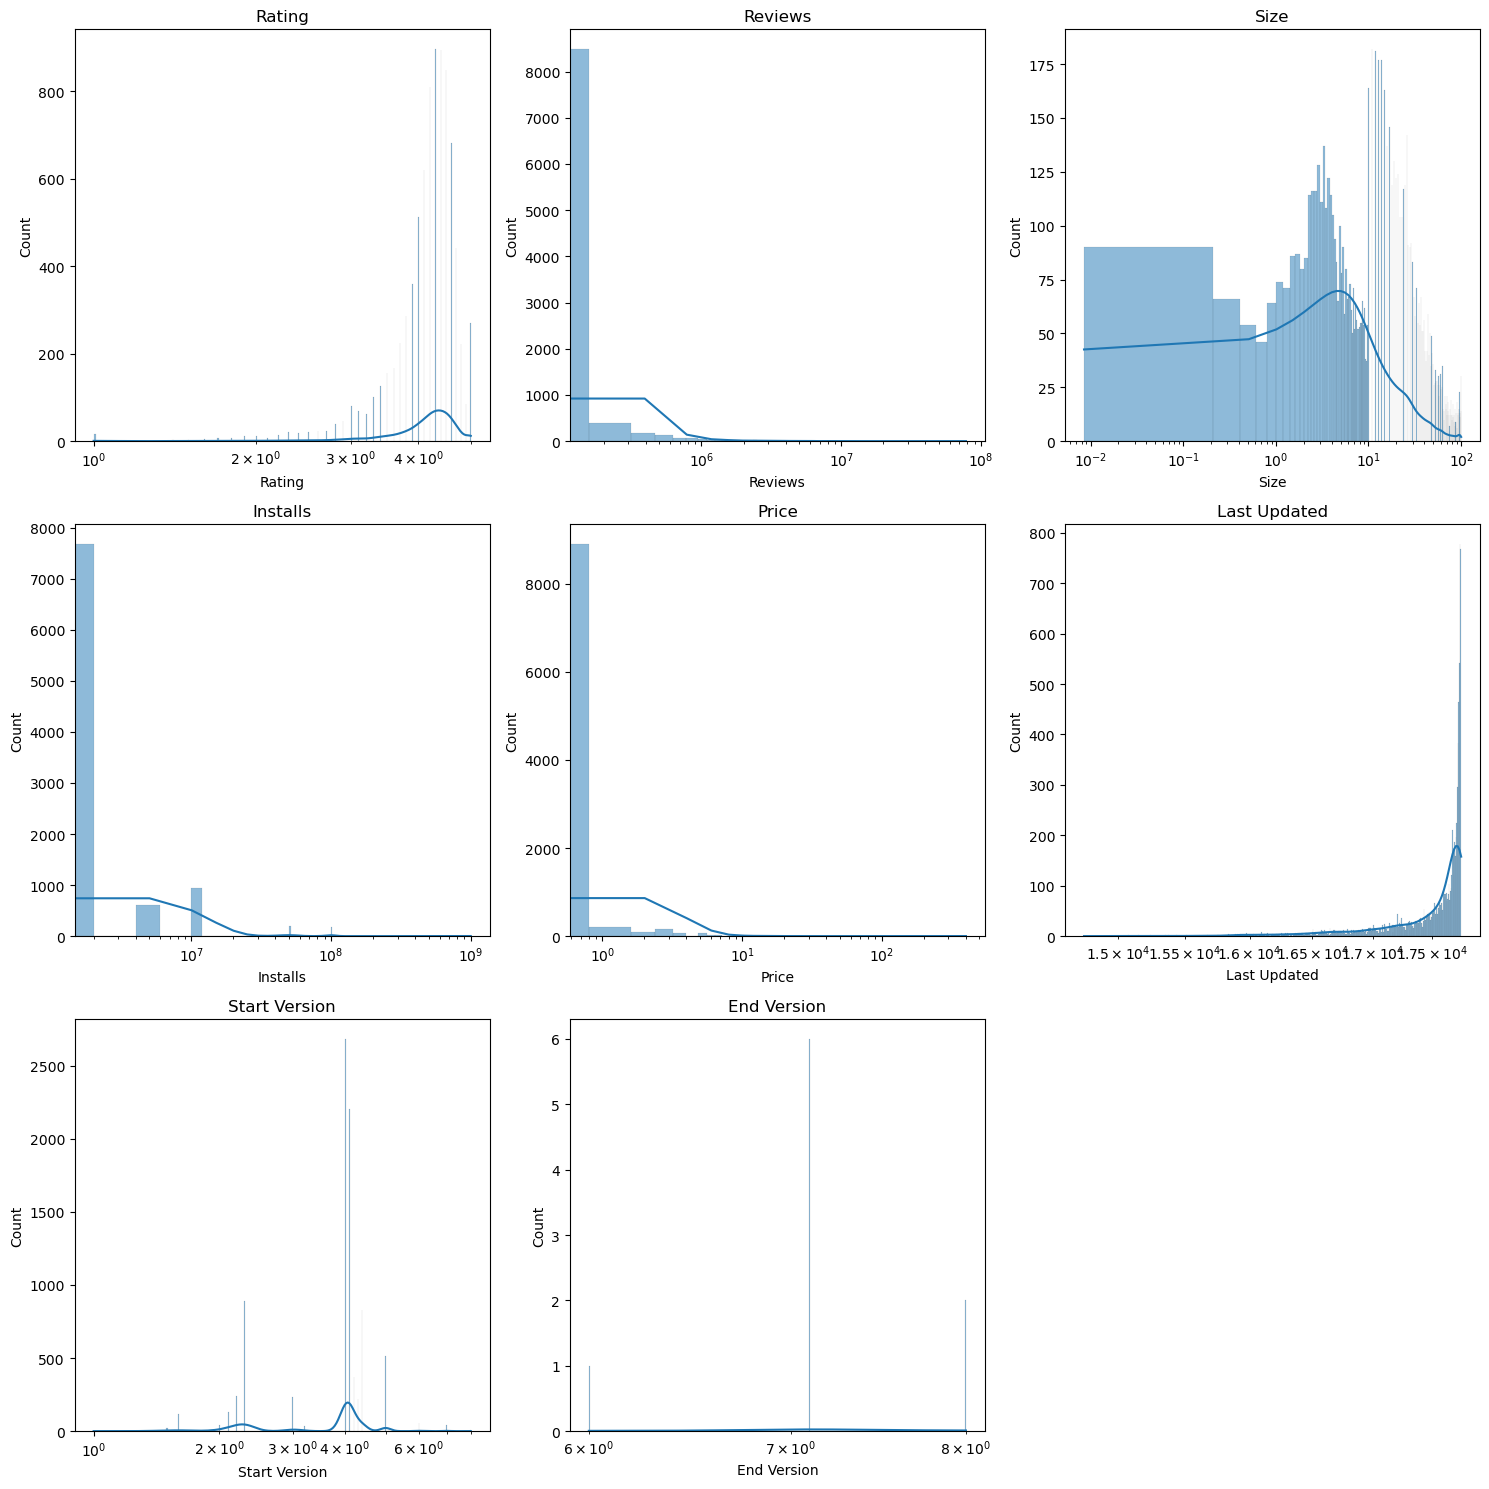

In [116]:
# חישוב דינמי של שורות ועמודות
ncols = 3  # מספר העמודות שרוצים בשורה
nrows = int(np.ceil(len(num_cols) / ncols))  # חישוב מספר השורות הדרושות

# יצירת הגריד
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# הפיכת axes למערך שטוח כדי למנוע בעיות אינדקס
axes = axes.flatten()

# הצגת כל עמודה בלולאה
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=500, kde=True, ax=axes[i])
    axes[i].set_xscale("log")  # שינוי הציר ל-log
    axes[i].set_title(col)

# מחיקת גרפים ריקים אם יש יותר מדי משבצות
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int32         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int32         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Start Version   8667 non-null   float64       
 14  End Version     9 non-null      float64       
dtypes: datet


Correlation Matrix  pearson  :


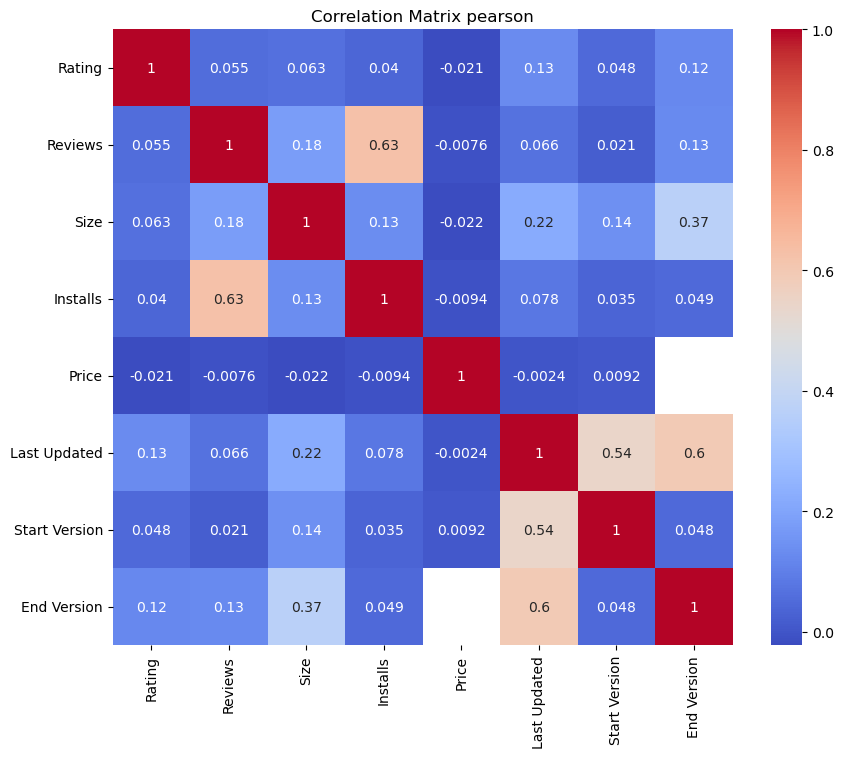


Correlation Matrix  kendall  :


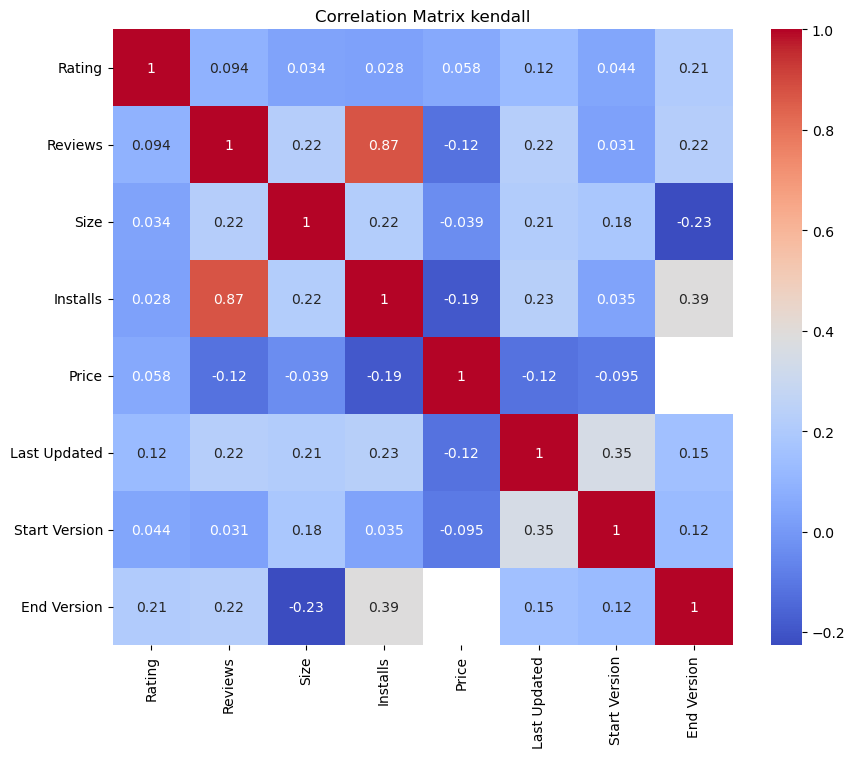


Correlation Matrix  spearman  :


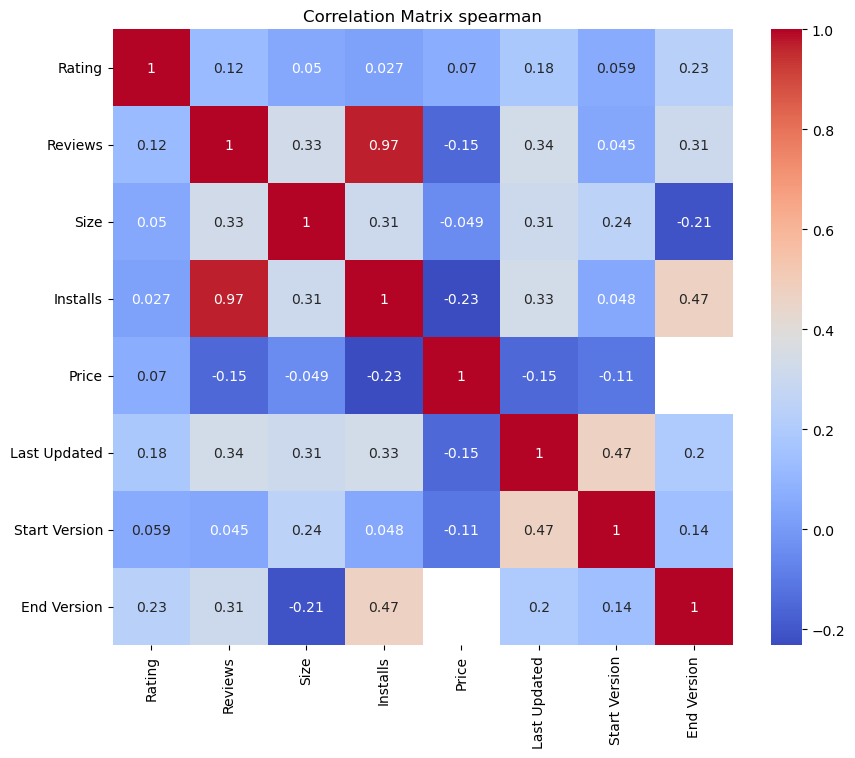

In [96]:

for corr_type in ['pearson', 'kendall', 'spearman']:
# Correlation matrix
    print("\nCorrelation Matrix ", corr_type, ' :')
    
    corr_matrix = df[num_cols].corr(corr_type)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix "+ corr_type)
    plt.show()

קיימת קורלציה בין עמודת ביקורות לכמות הורדות.

הקורלצייה היא לא לינארית אלא מערכית


Pairplot of Numerical Features:


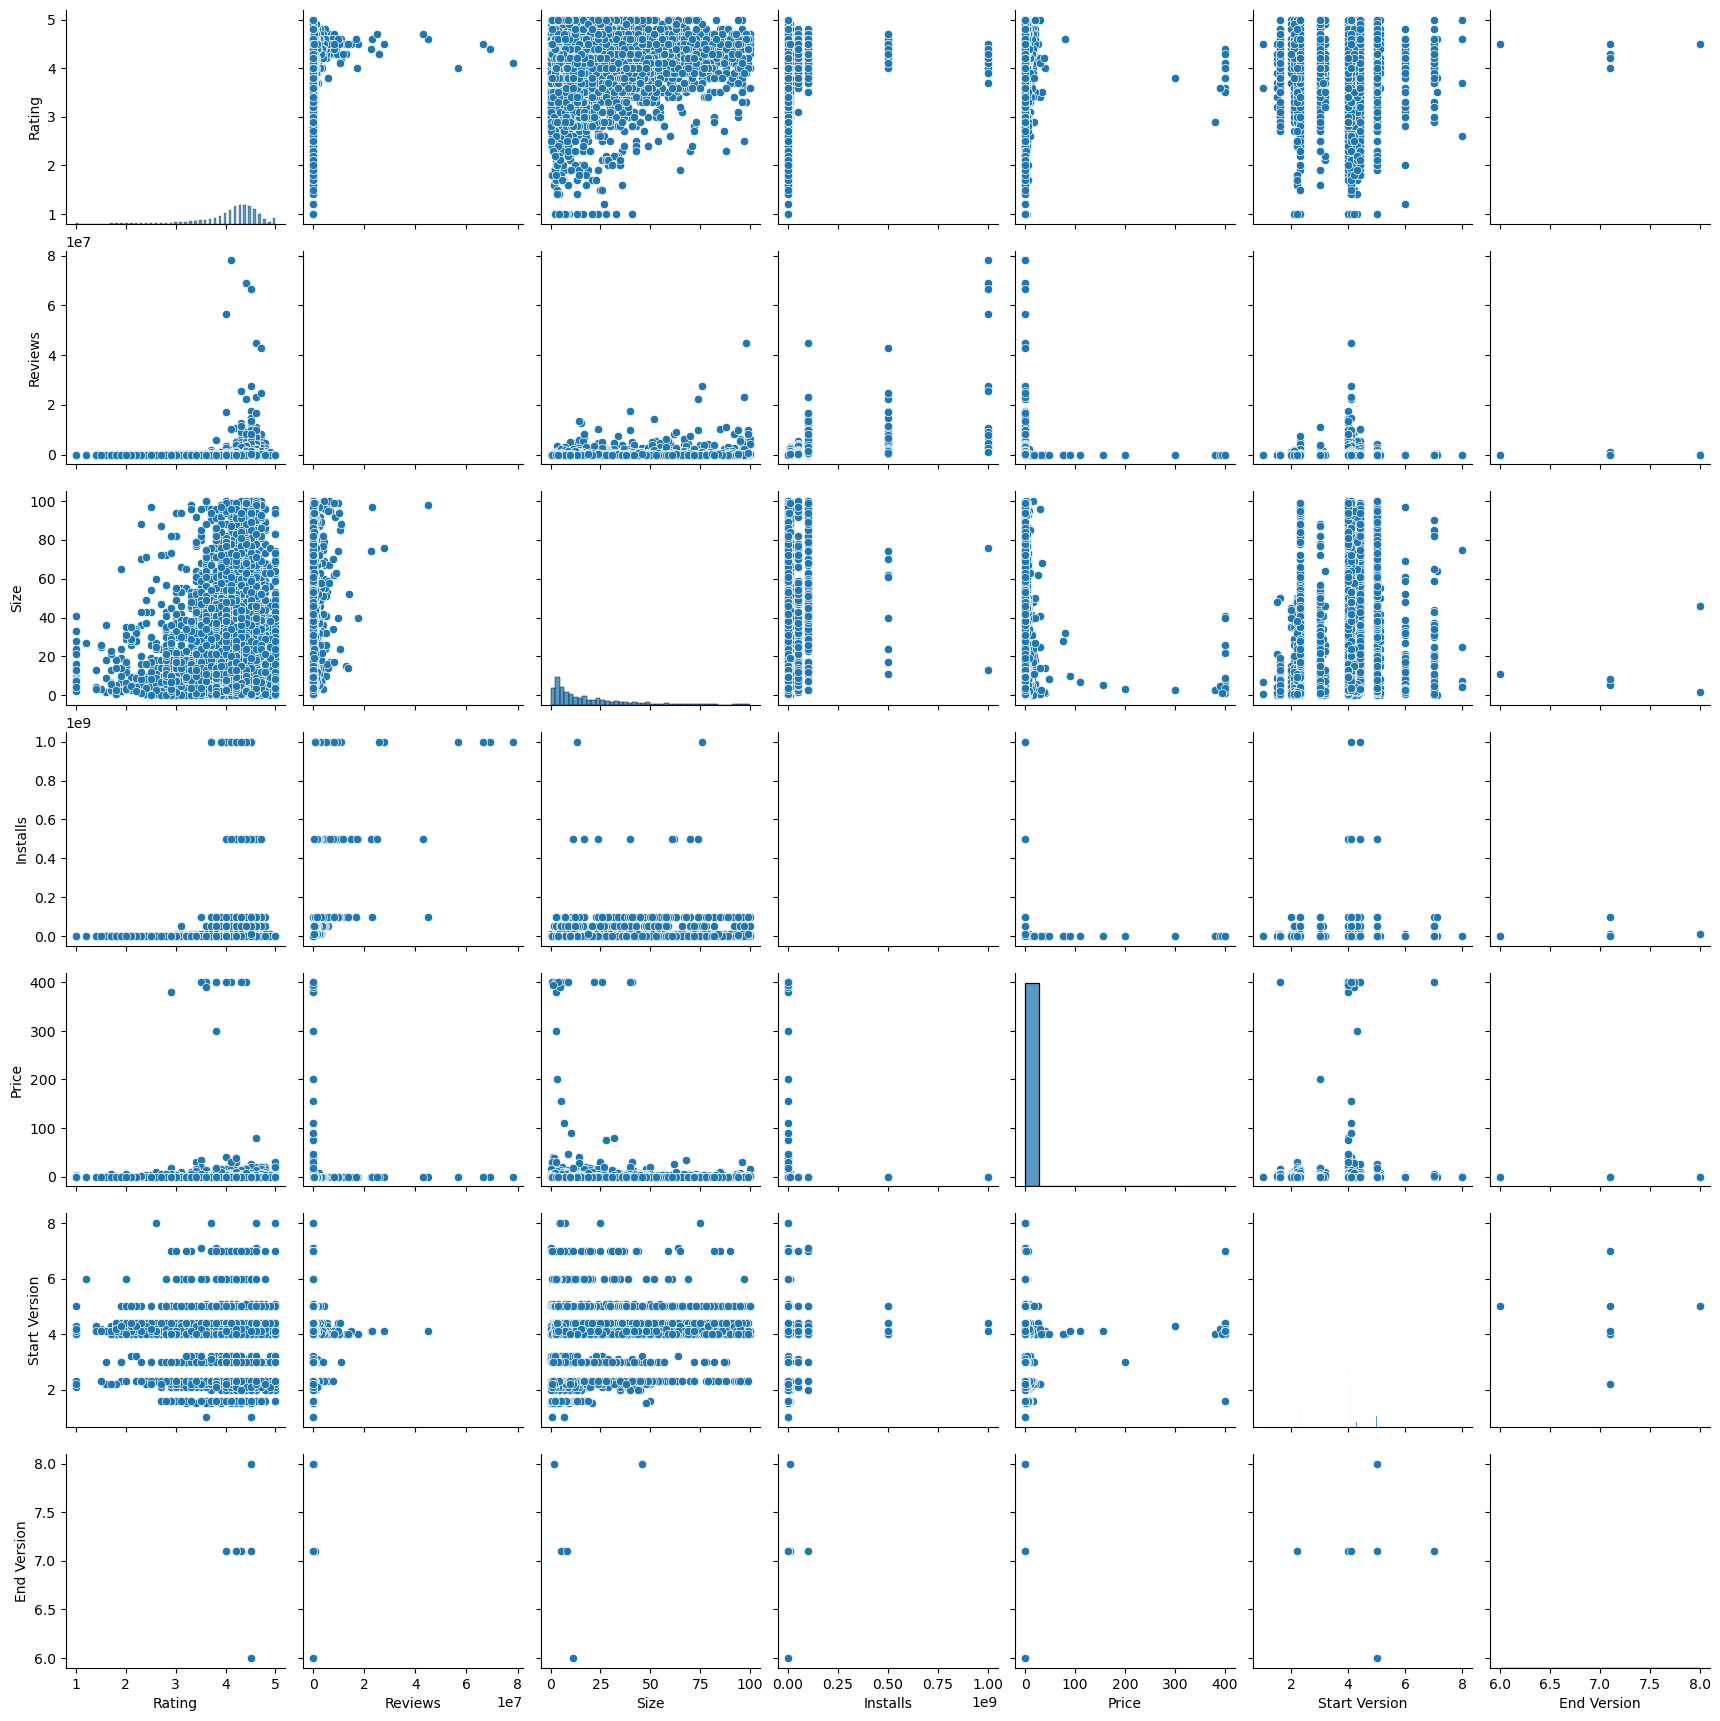

In [98]:
# Pairplot of numerical features
print("\nPairplot of Numerical Features:")
sns.pairplot(df[num_cols])
plt.show()

יש ערכים חריגים בעמודת ביקורת

In [119]:
df[df['Reviews']>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-01,Varies with device,Varies with device,NaN,NaN
336,WhatsApp Messenger,COMMUNICATION,4.40,69119316,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,NaN
1670,Clash of Clans,GAME,4.60,44891723,98.00,100000000,Free,0.00,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up,4.10,NaN
2544,Facebook,SOCIAL,4.10,78158306,NaN,1000000000,Free,0.00,Teen,Social,2018-08-03,Varies with device,Varies with device,NaN,NaN
2545,Instagram,SOCIAL,4.50,66577313,NaN,1000000000,Free,0.00,Teen,Social,2018-07-31,Varies with device,Varies with device,NaN,NaN
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,NaN,500000000,Free,0.00,Everyone,Tools,2018-08-03,Varies with device,Varies with device,NaN,NaN


In [121]:
df[df['Installs']>100000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Start Version,End Version
152,Google Play Books,BOOKS_AND_REFERENCE,3.90,1433233,NaN,1000000000,Free,0.00,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,NaN,NaN
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-01,Varies with device,Varies with device,NaN,NaN
336,WhatsApp Messenger,COMMUNICATION,4.40,69119316,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,NaN
338,Google Chrome: Fast & Secure,COMMUNICATION,4.30,9642995,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-01,Varies with device,Varies with device,NaN,NaN
340,Gmail,COMMUNICATION,4.30,4604324,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-02,Varies with device,Varies with device,NaN,NaN
341,Hangouts,COMMUNICATION,4.00,3419249,NaN,1000000000,Free,0.00,Everyone,Communication,2018-07-21,Varies with device,Varies with device,NaN,NaN
342,Viber Messenger,COMMUNICATION,4.30,11334799,NaN,500000000,Free,0.00,Everyone,Communication,2018-07-18,Varies with device,Varies with device,NaN,NaN
347,imo free video calls and chat,COMMUNICATION,4.30,4785892,11.00,500000000,Free,0.00,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,4.00,NaN
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.60,2083237,NaN,500000000,Free,0.00,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,4.40,NaN
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.50,17712922,40.00,500000000,Free,0.00,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,4.00,NaN


אלה לא ערכים חריגים אלה באמת אפליקציות מאוד מאוד נפוצות

In [131]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews           5330
Size               459
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2817
Android Ver         33
Start Version       21
End Version          3
dtype: int64

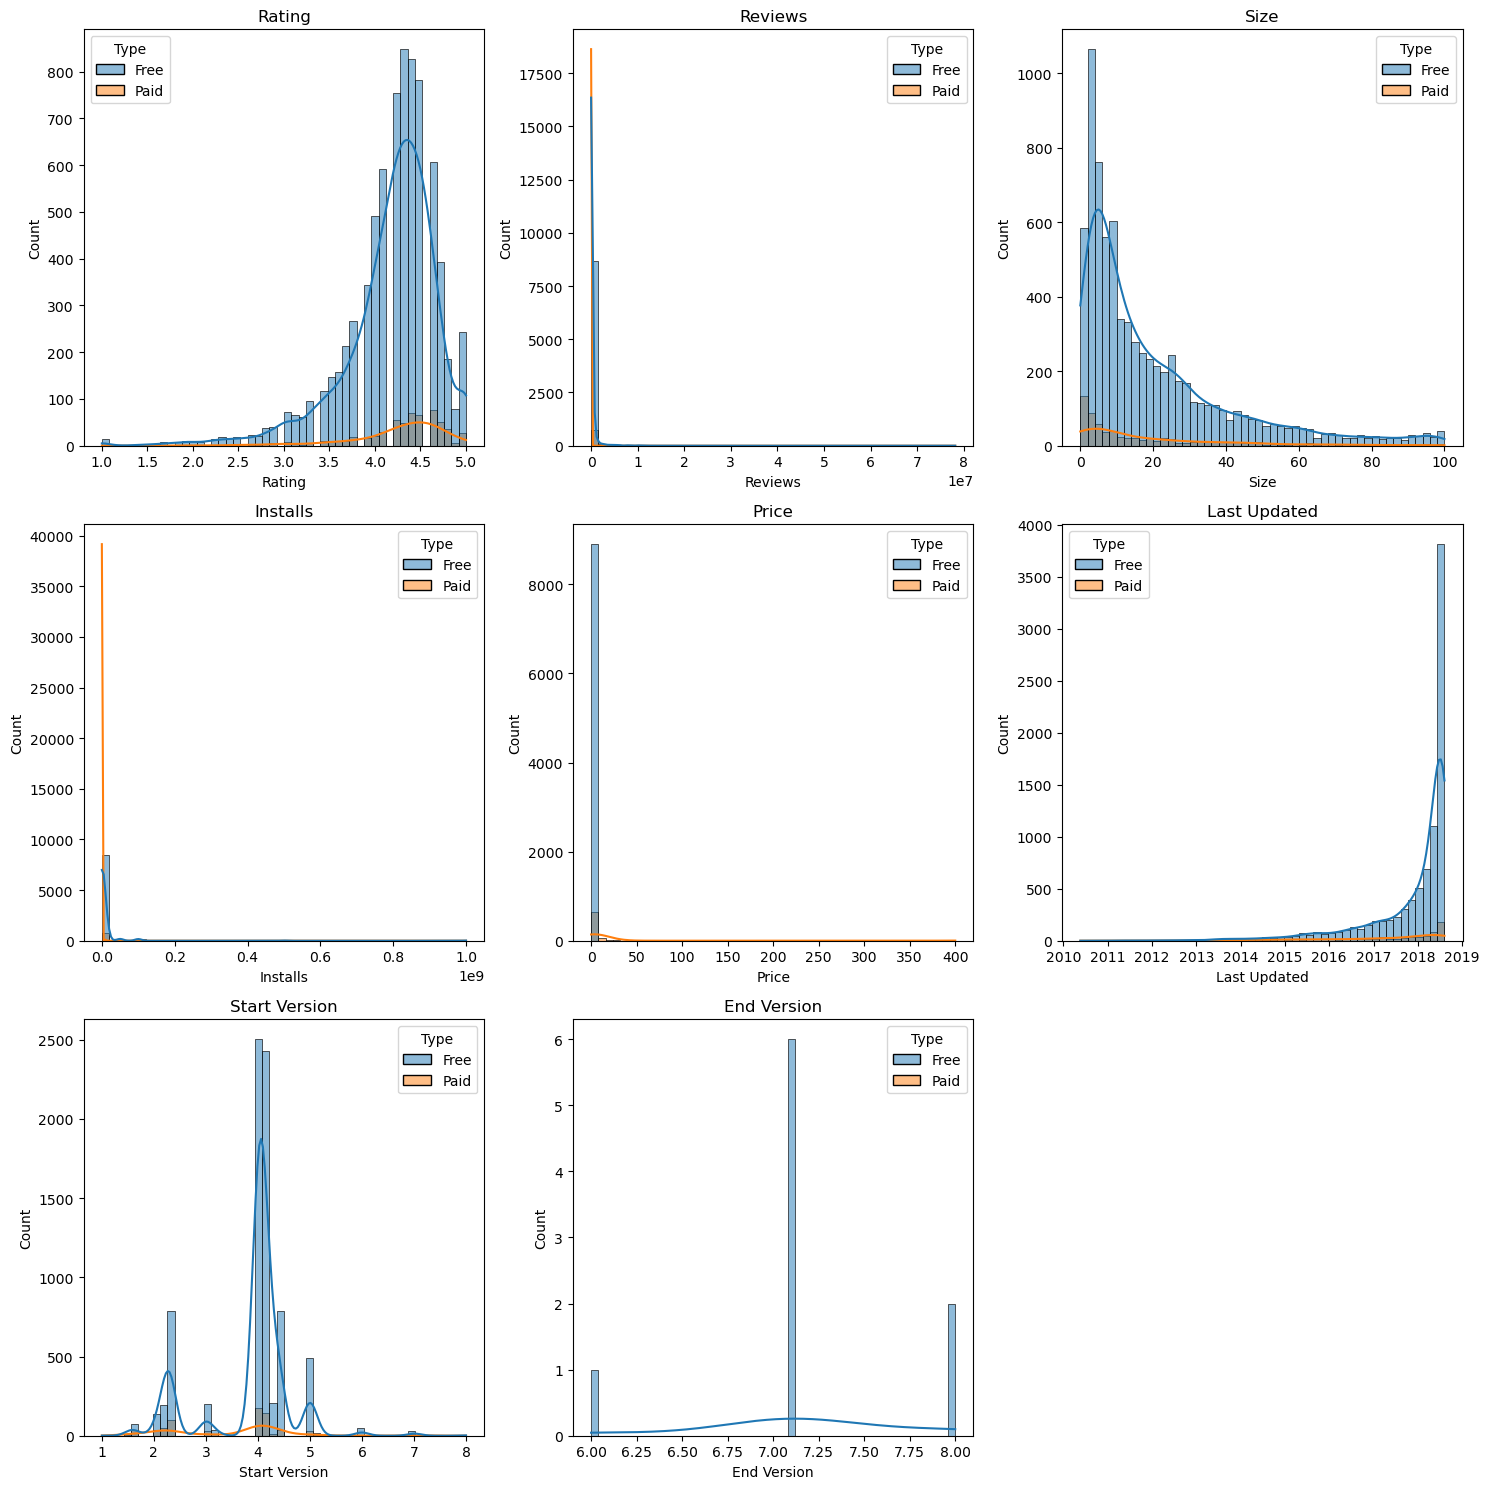

In [137]:

# חישוב דינמי של שורות ועמודות
ncols = 3  # מספר העמודות שרוצים בשורה
nrows = int(np.ceil(len(num_cols) / ncols))  # חישוב מספר השורות הדרושות

# יצירת הגריד
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# הפיכת axes למערך שטוח כדי למנוע בעיות אינדקס
axes = axes.flatten()

# הצגת כל עמודה בלולאה
for i, col in enumerate(num_cols):
    sns.histplot(df, x=col, hue='Type', bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)

# מחיקת גרפים ריקים אם יש יותר מדי משבצות
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

השכיח בעמודת דירוג באפליקציות בתשלום הוא יותר גבוה(4.6) מהשכיח של האפליקציות ללא תשלום(4.3)

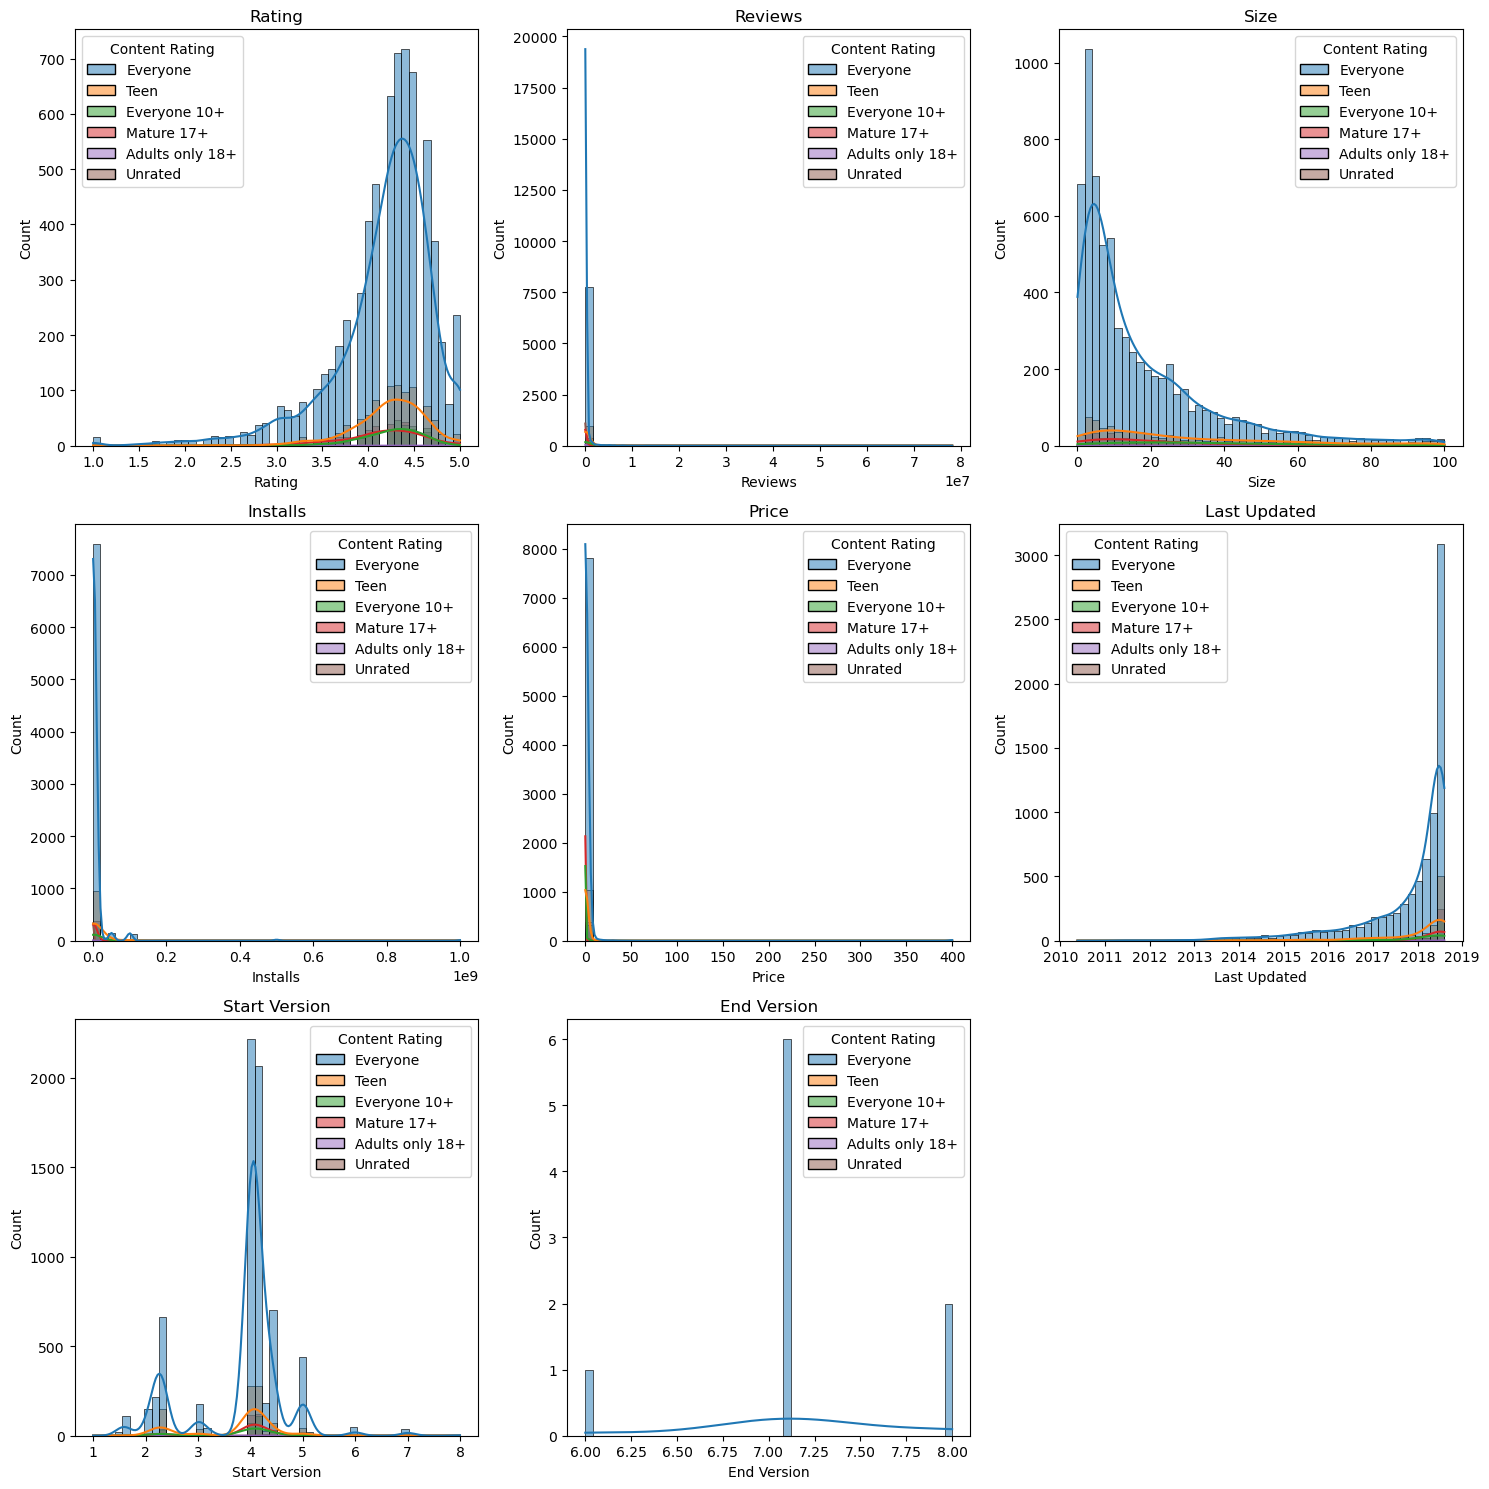

In [138]:

# חישוב דינמי של שורות ועמודות
ncols = 3  # מספר העמודות שרוצים בשורה
nrows = int(np.ceil(len(num_cols) / ncols))  # חישוב מספר השורות הדרושות

# יצירת הגריד
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# הפיכת axes למערך שטוח כדי למנוע בעיות אינדקס
axes = axes.flatten()

# הצגת כל עמודה בלולאה
for i, col in enumerate(num_cols):
    sns.histplot(df, x=col, hue='Content Rating', bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)

# מחיקת גרפים ריקים אם יש יותר מדי משבצות
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

  לא זיהיתי התנהגות שונה בחלוקה לפי דירוג התוכן,  
  אך ניכר בבירור שרוב מוחלט של האפליקציות הדירוג הוא לכולם

In [142]:
df["Type"].value_counts(normalize=True) * 100

Type
Free   92.17
Paid    7.83
Name: proportion, dtype: float64

In [136]:
pd.crosstab(df.Type,df.Category)

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Type,,,,,,,,,,,,,,,,,,,,,
Free,61,82,53,194,408,56,288,165,115,100,...,295,262,346,200,236,301,749,207,159,71
Paid,3,3,0,28,12,0,27,6,4,2,...,81,19,28,2,3,24,78,12,4,8


In [141]:
ct = pd.crosstab(df.Type, df.Category)

# הוספת עמודת התפלגות Type
ct["Total %"] = ct.sum(axis=1) / ct.sum().sum() * 100

# חישוב הטבלה כאחוזים מהסך הכולל לכל עמודה
ct_percent = ct.div(ct.sum(axis=0), axis=1) * 100

ct_percent

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Total %
Type,,,,,,,,,,,,,,,,,,,,,
Free,95.31,96.47,100.00,87.39,97.14,100.00,91.43,96.49,96.64,98.04,...,93.24,92.51,99.01,98.74,92.62,90.57,94.52,97.55,89.87,92.17
Paid,4.69,3.53,0.00,12.61,2.86,0.00,8.57,3.51,3.36,1.96,...,6.76,7.49,0.99,1.26,7.38,9.43,5.48,2.45,10.13,7.83


In [150]:
pd.crosstab(df.Type,df['Content Rating'])

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3,7248,290,375,984,2
Paid,0,655,31,18,52,0


In [151]:
ct = pd.crosstab(df.Type,df['Content Rating'])

# הוספת עמודת התפלגות Type
ct["Total %"] = ct.sum(axis=1) / ct.sum().sum() * 100

# חישוב הטבלה כאחוזים מהסך הכולל לכל עמודה
ct_percent = ct.div(ct.sum(axis=0), axis=1) * 100

ct_percent

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Total %
Type,,,,,,,
Free,100.00,91.71,90.34,95.42,94.98,100.00,92.17
Paid,0.00,8.29,9.66,4.58,5.02,0.00,7.83


In [148]:
pd.crosstab(df.Type,df['Installs'])

Installs,0,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Type,,,,,,,,,,,,,,,,,,,,
Free,4,46,70,315,170,616,288,750,403,914,429,1030,494,1397,607,935,202,188,24,20
Paid,10,21,12,70,34,94,40,138,65,117,40,82,11,20,0,2,0,0,0,0


In [149]:
ct = pd.crosstab(df.Type,df['Installs'])

# הוספת עמודת התפלגות Type
ct["Total %"] = ct.sum(axis=1) / ct.sum().sum() * 100

# חישוב הטבלה כאחוזים מהסך הכולל לכל עמודה
ct_percent = ct.div(ct.sum(axis=0), axis=1) * 100

ct_percent

Installs,0,1,5,10,50,100,500,1000,5000,10000,...,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000,Total %
Type,,,,,,,,,,,,,,,,,,,,,
Free,28.57,68.66,85.37,81.82,83.33,86.76,87.80,84.46,86.11,88.65,...,92.63,97.82,98.59,100.00,99.79,100.00,100.00,100.00,100.00,92.17
Paid,71.43,31.34,14.63,18.18,16.67,13.24,12.20,15.54,13.89,11.35,...,7.37,2.18,1.41,0.00,0.21,0.00,0.00,0.00,0.00,7.83


קיימת קורלציה הפוכה  
הסבירות של אפליקציה עם כמות הורדות נמוך להיות בתשלום הוא גבוה מאוד,  
לעומת זאת הסבירות של אפליקציה עם  כמות הורדות מאוד גבוה להיות בתשלום הוא אפסי

In [152]:
pd.crosstab(df['Content Rating'],df['Installs'])

Installs,0,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Content Rating,,,,,,,,,,,,,,,,,,,,
Adults only 18+,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0
Everyone,12,61,76,332,180,617,293,787,425,892,382,902,376,1105,457,693,145,138,19,11
Everyone 10+,1,0,1,4,3,6,2,15,7,27,17,41,30,66,26,50,12,12,1,1
Mature 17+,0,3,1,12,3,21,13,23,11,35,17,57,36,68,25,52,6,9,1,0
Teen,2,3,4,37,18,66,19,63,25,77,52,112,61,177,99,142,39,29,3,8
Unrated,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [155]:
ct = pd.crosstab(df['Content Rating'],df['Installs'])

# הוספת עמודת התפלגות Type
ct["Total %"] = (ct.sum(axis=1) / ct.sum().sum() * 100).round(0).astype(int)

# חישוב הטבלה כאחוזים מהסך הכולל לכל עמודה
ct_percent = (ct.div(ct.sum(axis=0), axis=1) * 100).round(0).astype(int)

ct_percent

Installs,0,1,5,10,50,100,500,1000,5000,10000,...,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000,Total %
Content Rating,,,,,,,,,,,,,,,,,,,,,
Adults only 18+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Everyone,80,91,93,86,88,87,89,89,91,87,...,81,74,78,75,74,72,73,79,55,82
Everyone 10+,7,0,1,1,1,1,1,2,1,3,...,4,6,5,4,5,6,6,4,5,3
Mature 17+,0,4,1,3,1,3,4,3,2,3,...,5,7,5,4,6,3,5,4,0,4
Teen,13,4,5,10,9,9,6,7,5,7,...,10,12,12,16,15,19,15,12,40,11
Unrated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


אמנם התפלגות של דירוג תוכן בכמות ההורדות הגבוה ביותר שונה מאוד מההתפלגות הכוללת  
אך לא ניתן ללמוד מזה כלום כי כמות האפליקציות שכמות ההורדות היא הגבוהה ביותר קטנה 

In [156]:
pd.crosstab(df['Category'],df['Installs'])

Installs,0,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,1,0,0,0,0,1,0,3,5,11,6,19,6,4,3,4,1,0,0,0
AUTO_AND_VEHICLES,0,1,2,5,1,6,3,8,2,6,5,23,5,13,3,2,0,0,0,0
BEAUTY,0,0,0,0,1,5,1,1,3,13,5,8,6,8,1,1,0,0,0,0
BOOKS_AND_REFERENCE,0,1,7,19,3,7,9,34,16,25,12,20,16,20,9,19,0,4,0,1
BUSINESS,1,5,18,42,25,76,23,49,17,46,11,30,8,34,15,13,5,2,0,0
COMICS,0,0,0,0,1,1,0,1,4,11,7,10,5,11,4,1,0,0,0,0
COMMUNICATION,0,1,2,19,5,33,11,22,19,25,10,19,9,41,22,43,7,16,5,6
DATING,0,2,1,10,6,17,12,13,9,21,5,24,18,19,6,8,0,0,0,0
EDUCATION,0,0,0,0,0,0,0,2,0,5,6,21,13,44,14,13,0,1,0,0


In [157]:
ct = pd.crosstab(df['Category'],df['Installs'])

# הוספת עמודת התפלגות Type
ct["Total %"] = (ct.sum(axis=1) / ct.sum().sum() * 100).round(0).astype(int)

# חישוב הטבלה כאחוזים מהסך הכולל לכל עמודה
ct_percent = (ct.div(ct.sum(axis=0), axis=1) * 100).round(0).astype(int)

ct_percent

Installs,0,1,5,10,50,100,500,1000,5000,10000,...,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000,Total %
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,7,0,0,0,0,0,0,0,1,1,...,2,1,0,0,0,0,0,0,0,1
AUTO_AND_VEHICLES,0,1,2,1,0,1,1,1,0,1,...,2,1,1,0,0,0,0,0,0,1
BEAUTY,0,0,0,0,0,1,0,0,1,1,...,1,1,1,0,0,0,0,0,0,1
BOOKS_AND_REFERENCE,0,1,9,5,1,1,3,4,3,2,...,2,3,1,1,2,0,2,0,5,2
BUSINESS,7,7,22,11,12,11,7,6,4,4,...,3,2,2,2,1,2,1,0,0,4
COMICS,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,1
COMMUNICATION,0,1,2,5,2,5,3,2,4,2,...,2,2,3,4,5,3,9,21,30,3
DATING,0,3,1,3,3,2,4,1,2,2,...,2,4,1,1,1,0,0,0,0,2
EDUCATION,0,0,0,0,0,0,0,0,0,0,...,2,3,3,2,1,0,1,0,0,1


אחוז של כמות ההורדות הגבוה ביותר הוא מ2 קטגוריות  
סושיאל ותקשורת

In [158]:
pd.crosstab(df['Category'],df['Content Rating'])

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0,60,1,0,3,0
AUTO_AND_VEHICLES,0,83,1,0,1,0
BEAUTY,0,45,2,3,3,0
BOOKS_AND_REFERENCE,0,198,4,3,17,0
BUSINESS,0,405,1,1,13,0
COMICS,2,26,3,6,19,0
COMMUNICATION,0,280,0,8,27,0
DATING,0,17,0,145,9,0
EDUCATION,0,112,3,3,1,0


In [159]:
ct = pd.crosstab(df['Category'],df['Content Rating'])

# הוספת עמודת התפלגות Type
ct["Total %"] = (ct.sum(axis=1) / ct.sum().sum() * 100).round(0).astype(int)

# חישוב הטבלה כאחוזים מהסך הכולל לכל עמודה
ct_percent = (ct.div(ct.sum(axis=0), axis=1) * 100).round(0).astype(int)

ct_percent

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Total %
Category,,,,,,,
ART_AND_DESIGN,0,1,0,0,0,0,1
AUTO_AND_VEHICLES,0,1,0,0,0,0,1
BEAUTY,0,1,1,1,0,0,1
BOOKS_AND_REFERENCE,0,3,1,1,2,0,2
BUSINESS,0,5,0,0,1,0,4
COMICS,67,0,1,2,2,0,1
COMMUNICATION,0,4,0,2,3,0,3
DATING,0,0,0,37,1,0,2
EDUCATION,0,1,1,1,0,0,1


הקטגוריות המובילות לכל דירוג תוכן:  
נוער -  משחקים ורשתות חברתיות  
שבע עשרה + - דייטים 
עשר + - משפחה, משחקים, חדשות
שמונה עשרה + - קומיקס וספורט

In [160]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews           5330
Size               459
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2817
Android Ver         33
Start Version       21
End Version          3
dtype: int64

Genres,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,...,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,0,0,0,0,0,0,0,0,0,57,...,0,0,0,0,0,0,0,0,0,0
AUTO_AND_VEHICLES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BEAUTY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOOKS_AND_REFERENCE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSINESS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COMICS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COMMUNICATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DATING,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EDUCATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
